<img style="float: right;" src="images/Earthwave_logo.png" alt="earthwave" width="90"/> <img style="float: right;" src="images/UZH_logo.jpg" alt="uzh" width="200"/> <img style="float: right;" src="images/ESA_logo.png" alt="esa" width="150"/>

<img src="images/GlaMBIE_logo.png" alt="logo" width="400"/>

#<strong><font color='#11847C'> Gla</font>cier <font color='#11847C'>M</font>ass <font color='#11847C'>B</font>alance <font color='#11847C'>I</font>ntercomparison <font color='#11847C'>E</font>xercise - *A community effort to reconcile measurements of glacier mass balance*</strong>

##This Jupyter Notebook can be used to explore and visualise the final results from the Glacier Mass Balance Intercomparison Exercise (GlaMBIE). In the following code, you can produce plots that demonstrate the global results from the GlaMBIE project. You can also investigate the contributions from individual regions to the global picture.

<div>

## <strong>Getting started</strong>
</div>

First, we import the necessary packages

In [16]:
from google.cloud.storage import Client
import pandas as pd
import glob, os
from pathlib import Path

from helpers import glambie_regions_dropdown, glambie_years_dropdown, derivative_to_cumulative, load_all_region_dataframes_cumulative, create_change_dataframe_for_single_year
from plotting import single_region_cumulative_plot, global_comparison_region_plot
import seaborn as sns
sns.set_theme(palette='muted', style='whitegrid', font_scale=1.2)
colors_list = sns.color_palette(n_colors=19)

import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt

In [2]:
# This line is only necessary when running locally. Once data is available online, it will be downloaded in 
# above cell to the local Colab working directory, so won't need to add local path to the start of 'data_directory' below
local_path = '/data/ox1/working/glambie/demo_notebooks'

In [3]:
temporal_option = 'calendar_years'
data_directory = os.path.join(local_path, 'glambie_csvs_to_publish_v3', temporal_option)

In [4]:
global_dataframe = pd.read_csv(os.path.join(data_directory, '0_global.csv'))

In [5]:
cumulative_data_all_gt = derivative_to_cumulative(global_dataframe.start_dates, global_dataframe.end_dates, global_dataframe.combined_gt)
cumulative_errors_all_gt = derivative_to_cumulative(global_dataframe.start_dates, global_dataframe.end_dates, global_dataframe.combined_gt_errors, calculate_as_errors=True)

In [ ]:
single_region_cumulative_plot(cumulative_data_all_gt, cumulative_errors_all_gt, '0_global', 'Gt')

In [6]:
# Add multiple regions to plot to see contributions to global change
first_region = glambie_regions_dropdown()
first_region

Dropdown(description='Region:', options={'Alaska': '1_alaska', 'Western Canada & US': '2_western_canada_us', '…

In [7]:
second_region = glambie_regions_dropdown()
second_region

Dropdown(description='Region:', options={'Alaska': '1_alaska', 'Western Canada & US': '2_western_canada_us', '…

In [8]:
third_region = glambie_regions_dropdown()
third_region

Dropdown(description='Region:', options={'Alaska': '1_alaska', 'Western Canada & US': '2_western_canada_us', '…

In [9]:
list_of_csvs = sorted(glob.glob(os.path.join(data_directory, '*.csv')))
for filename in list_of_csvs:
    if first_region.value in filename:
        first_region_dataframe = pd.read_csv(filename)
    if second_region.value in filename:
        second_region_dataframe = pd.read_csv(filename)
    if third_region.value in filename:
        third_region_dataframe = pd.read_csv(filename)

cumulative_data_first_region_gt = derivative_to_cumulative(first_region_dataframe.start_dates, first_region_dataframe.end_dates, first_region_dataframe.combined_gt)
cumulative_errors_first_region_gt = derivative_to_cumulative(first_region_dataframe.start_dates, first_region_dataframe.end_dates, first_region_dataframe.combined_gt_errors, calculate_as_errors=True)

cumulative_data_second_region_gt = derivative_to_cumulative(second_region_dataframe.start_dates, second_region_dataframe.end_dates, second_region_dataframe.combined_gt)
cumulative_errors_second_region_gt = derivative_to_cumulative(second_region_dataframe.start_dates, second_region_dataframe.end_dates, second_region_dataframe.combined_gt_errors, calculate_as_errors=True)

cumulative_data_third_region_gt = derivative_to_cumulative(third_region_dataframe.start_dates, third_region_dataframe.end_dates, third_region_dataframe.combined_gt)
cumulative_errors_third_region_gt = derivative_to_cumulative(third_region_dataframe.start_dates, third_region_dataframe.end_dates, third_region_dataframe.combined_gt_errors, calculate_as_errors=True)

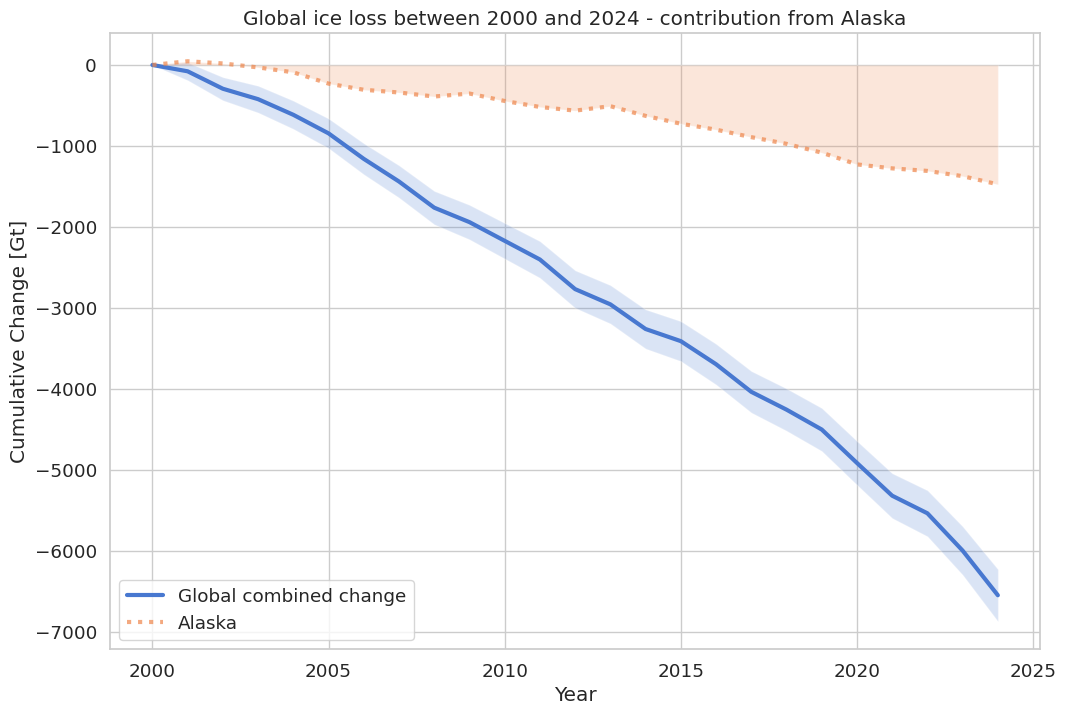

In [10]:
# alternative plot shading the contribution from a region to the global loss
global_comparison_region_plot(cumulative_data_all_gt, cumulative_errors_all_gt, cumulative_data_first_region_gt, cumulative_errors_first_region_gt, first_region.value, shaded=True)

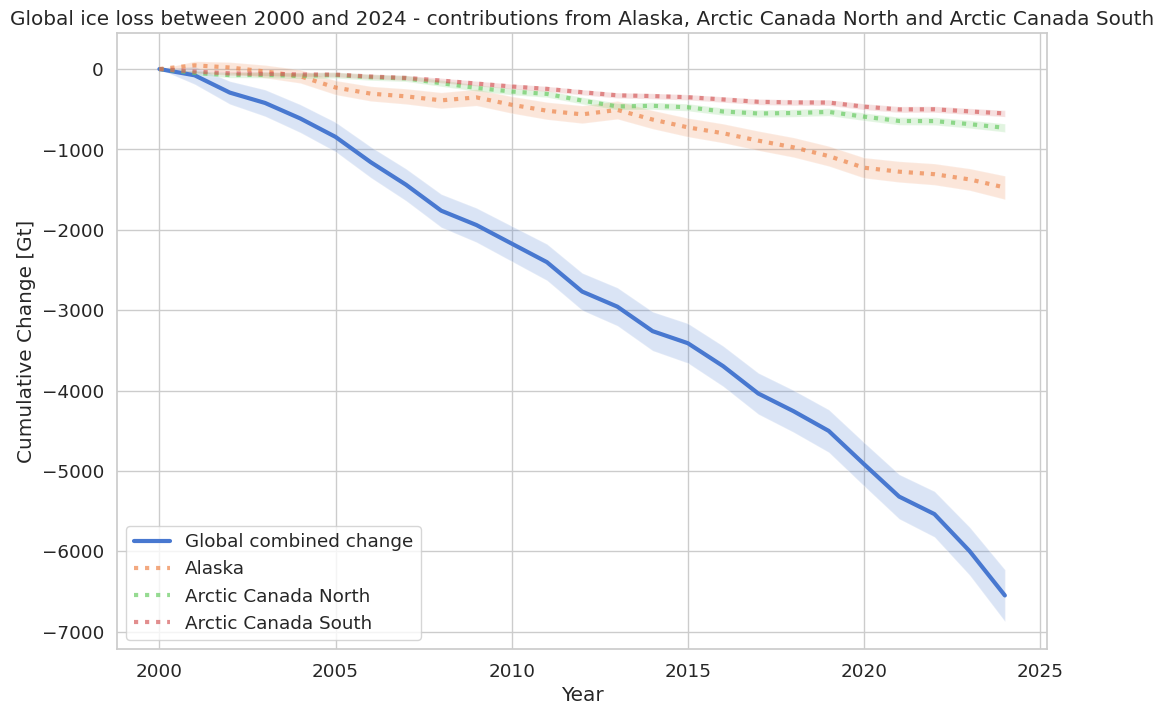

In [11]:
global_comparison_region_plot(cumulative_data_all_gt, cumulative_errors_all_gt, cumulative_data_first_region_gt, cumulative_errors_first_region_gt, first_region.value,
                              cumulative_data_second_region_gt, cumulative_errors_second_region_gt, second_region.value, cumulative_data_third_region_gt, cumulative_errors_third_region_gt, third_region.value, shaded=False)

In [13]:
def plot_histogram_of_region_contributions_to_global_loss(glambie_dataframe_dict, chosen_year, colors_list):

    chosen_year_all_regions_df = create_change_dataframe_for_single_year(glambie_dataframe_dict, chosen_year)
    
    index = np.arange(19)
    fig, axs = plt.subplots(1, 1, figsize=(10, 10))
    axs.barh(index, chosen_year_all_regions_df.change, tick_label=chosen_year_all_regions_df.region, color=colors_list)
    axs.vlines(0, index[0]-1, index[-1]+1, linestyle='dashed', color='k')
    axs.set_xlim(100, -1200)

    axs.set_xlabel('Cumulative Change in {} [Gt]'.format(chosen_year))

In [14]:
def plot_histogram_of_region_contributions_to_global_loss_two_years(glambie_dataframe_dict, chosen_year, comparison_year):
    
    chosen_year_all_regions_df = create_change_dataframe_for_single_year(glambie_dataframe_dict, chosen_year)
    comparison_year_all_regions_df = create_change_dataframe_for_single_year(glambie_dataframe_dict, comparison_year)
    bar_width = 0.5
    
    index = np.arange(19)
    fig, axs = plt.subplots(1, 1, figsize=(10, 10))
    axs.barh(index, chosen_year_all_regions_df.change, bar_width, tick_label=chosen_year_all_regions_df.region, label=str(chosen_year))
    axs.barh(index+bar_width, comparison_year_all_regions_df.change, bar_width, label=str(comparison_year))
    axs.vlines(0, index[0]-1, index[-1]+1, linestyle='dashed', color='k')
    axs.set_xlim(100, -1200)

    axs.set_xlabel('Cumulative Change in {} [Gt]'.format(chosen_year))

In [15]:
# Choose a year and see contribtuion from every region to global trend
chosen_year = glambie_years_dropdown()
chosen_year

Dropdown(description='Year: ', options=(2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011…

In [17]:
glambie_dataframe_dict = load_all_region_dataframes_cumulative(list_of_csvs)

/data/ox1/working/glambie/demo_notebooks/glambie_csvs_to_publish_v3/calendar_years/0_global.csv
/data/ox1/working/glambie/demo_notebooks/glambie_csvs_to_publish_v3/calendar_years/10_north_asia.csv
/data/ox1/working/glambie/demo_notebooks/glambie_csvs_to_publish_v3/calendar_years/11_central_europe.csv
/data/ox1/working/glambie/demo_notebooks/glambie_csvs_to_publish_v3/calendar_years/12_caucasus_middle_east.csv
/data/ox1/working/glambie/demo_notebooks/glambie_csvs_to_publish_v3/calendar_years/13_central_asia.csv
/data/ox1/working/glambie/demo_notebooks/glambie_csvs_to_publish_v3/calendar_years/14_south_asia_west.csv
/data/ox1/working/glambie/demo_notebooks/glambie_csvs_to_publish_v3/calendar_years/15_south_asia_east.csv
/data/ox1/working/glambie/demo_notebooks/glambie_csvs_to_publish_v3/calendar_years/16_low_latitudes.csv
/data/ox1/working/glambie/demo_notebooks/glambie_csvs_to_publish_v3/calendar_years/17_southern_andes.csv
/data/ox1/working/glambie/demo_notebooks/glambie_csvs_to_publis

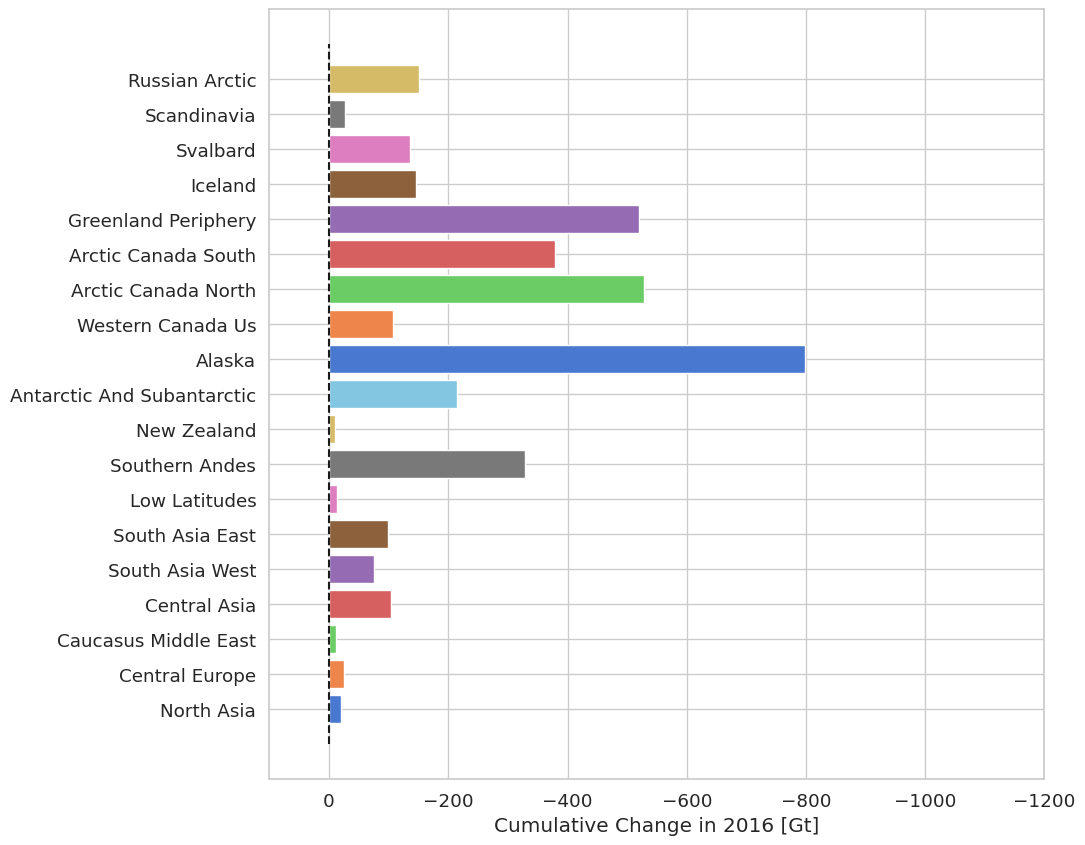

In [18]:
plot_histogram_of_region_contributions_to_global_loss(glambie_dataframe_dict, chosen_year.value, colors_list)

In [19]:
comparsion_year = glambie_years_dropdown()
comparsion_year

Dropdown(description='Year: ', options=(2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011…

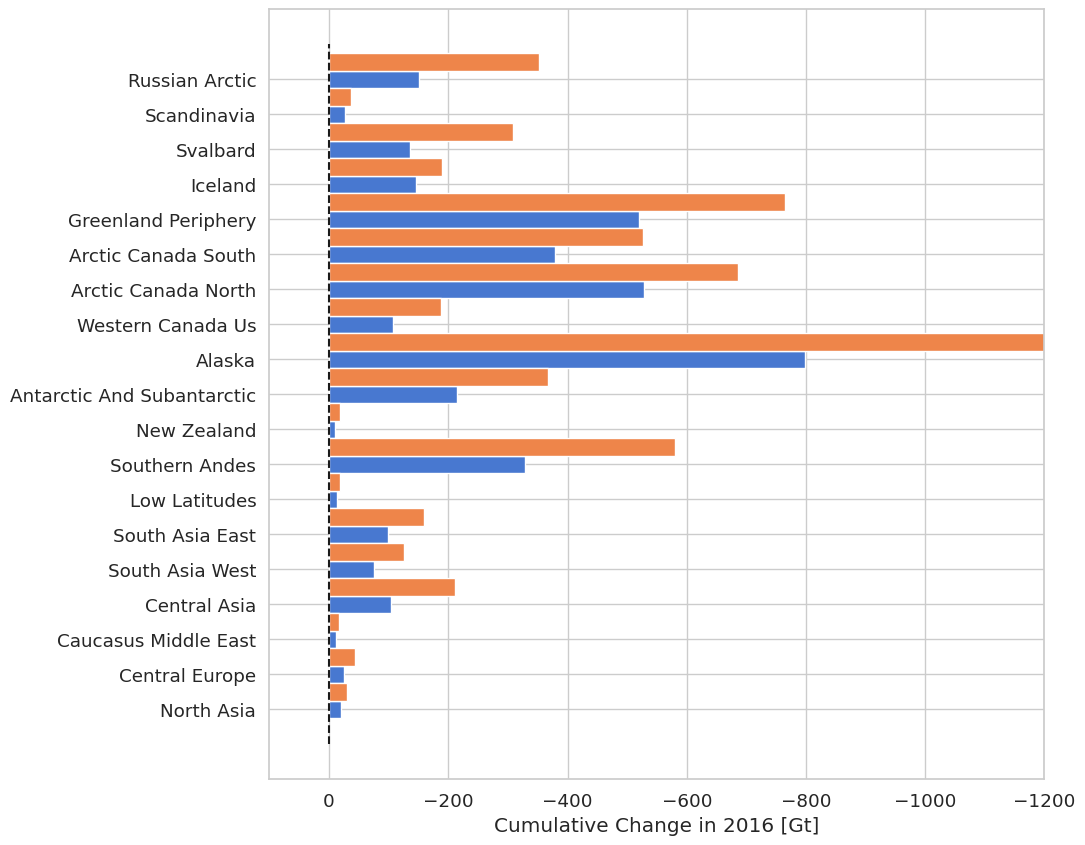

In [21]:
plot_histogram_of_region_contributions_to_global_loss_two_years(glambie_dataframe_dict, chosen_year.value, comparsion_year.value)